In [23]:
# importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
df = pd.read_csv('breast-cancer.csv')
df.head().T

0         1         2         3         4
id                         842302    842517  84300903  84348301  84358402
diagnosis                       M         M         M         M         M
radius_mean                 17.99     20.57     19.69     11.42     20.29
texture_mean                10.38     17.77     21.25     20.38     14.34
perimeter_mean              122.8     132.9     130.0     77.58     135.1
area_mean                  1001.0    1326.0    1203.0     386.1    1297.0
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198
concave points_mean        0.1471   0.07017    0.1279    0.1052    0.1043
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809
fractal_dimension_mean    0.07871   0.05667   0.05999   0.09744   0.05883
radius_se                   1.095    0.5435    0.7456    0.4956    0.7572
texture_se                 0.9053    0.7339    0.7869     1.156    0.7813
perimeter_se                8.589     3.398     4.585     3.445     5.438
area_se                     153.4     74.08     94.03     27.23     94.44
smoothness_se            0.006399  0.005225   0.00615   0.00911   0.01149
compactness_se            0.04904   0.01308   0.04006   0.07458   0.02461
concavity_se              0.05373    0.0186   0.03832   0.05661   0.05688
concave points_se         0.01587    0.0134   0.02058   0.01867   0.01885
symmetry_se               0.03003   0.01389    0.0225   0.05963   0.01756
fractal_dimension_se     0.006193  0.003532  0.004571  0.009208  0.005115
radius_worst                25.38     24.99     23.57     14.91     22.54
texture_worst               17.33     23.41     25.53      26.5     16.67
perimeter_worst             184.6     158.8     152.5     98.87     152.2
area_worst                 2019.0    1956.0    1709.0     567.7    1575.0
smoothness_worst           0.1622    0.1238    0.1444    0.2098    0.1374
compactness_worst          0.6656    0.1866    0.4245    0.8663     0.205
concavity_worst            0.7119    0.2416    0.4504    0.6869       0.4
concave points_worst       0.2654     0.186     0.243    0.2575    0.1625
symmetry_worst             0.4601     0.275    0.3613    0.6638    0.2364
fractal_dimension_worst    0.1189   0.08902   0.08758     0.173   0.07678

### Analysing data

In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df.sample(1)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
31  853612         M        11.84          18.7           77.93      440.6   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
31           0.1109            0.1516          0.1218              0.05182   

    ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
31  ...         16.82          28.12            119.4       888.7   

    smoothness_worst  compactness_worst  concavity_worst  \
31            0.1637             0.5775           0.6956   

    concave points_worst  symmetry_worst  fractal_dimension_worst  
31                0.1546          0.4761                   0.1402  

[1 rows x 32 columns]

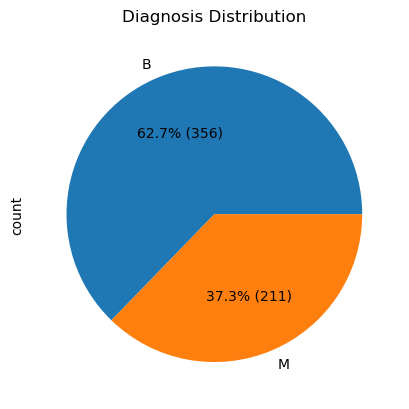

In [9]:
# we need to visualize data distr of target columns

counts = df['diagnosis'].value_counts()

counts.plot(
    kind = 'pie',
    autopct = lambda p: f'{p:.1f}% ({int(p*sum(counts)/100)})',
    title = "Diagnosis Distribution"
)

plt.show()

In [10]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%    

In [12]:
# Scaling Features to normalize the values
X = df.drop(columns=['id', 'diagnosis'])  # Dropping the target column
y = df['diagnosis']

In [13]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional, for easier handling)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se   area_se  \
0                2.255747   2.489734   -0.565265      2.833031  2.487578   
1               -0.868652   0.499255   -0.876244      0.263327  0.742402   
2               -0.398008   1.228676   -0.780083      0.850928  1.181336   
3                4.910919   0.326373   -0.110409      0.286593 -0.288378   
4               -0.562450   1.270543   -0.790244      1.273189  1.190357   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0      -0.214002        1.316862      0.724026           0.660820   
1      -0.605351       -0.692926     -0.440780           0.260162   
2      -0.297005        0.814974      0.213076           1.424827   
3       0.689702        2.744280      0.819518           1.115007   
4       1.483067       -0.048520      0.828471           1.144205   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0     1.148757              0.907083      1.886690      -1.359293   
1    -0.805450             -0.099444      1.805927      -0.369203   
2     0.237036              0.293559      1.511870      -0.023974   
3     4.732680              2.047511     -0.281464       0.133984   
4    -0.361092              0.499328      1.298575      -1.466770   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0         2.303601    2.001237          1.307686           2.616665   
1         1.535126    1.890489         -0.375612          -0.430444   
2         1.347475    1.456285          0.527407           1.082932   
3        -0.249939   -0.550021          3.394275           3.893397   
4         1.338539    1.220724          0.220556          -0.313395   

   concavity_worst  concave points_worst  symmetry_worst  \
0         2.109526              2.296076        2.750622   
1        -0.146749              1.087084       -0.243890   
2         0.854974              1.955000        1.152255   
3         1.989588              2.175786        6.046041   
4         0.613179              0.729259       -0.868353   

   fractal_dimension_worst  
0                 1.937015  
1                 0.281190  
2                 0.201391  
3                 4.935010  
4                -0.397100

In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [15]:
# Training Logistic Regression
lr_full = LogisticRegression()
lr_full.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Training Random Forest
rf_full = RandomForestClassifier()
rf_full.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
# Logistic Regression
y_pred_lr_full = lr_full.predict(X_test)
print("Logistic Regression (Full Features)")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_full))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_full))

Logistic Regression (Full Features)
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           B       1.00      0.97      0.98        67
           M       0.96      1.00      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [19]:
# Random Forest
y_pred_rf_full = rf_full.predict(X_test)
print("\nRandom Forest (Full Features)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_full))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_full))


Random Forest (Full Features)
Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        67
           M       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



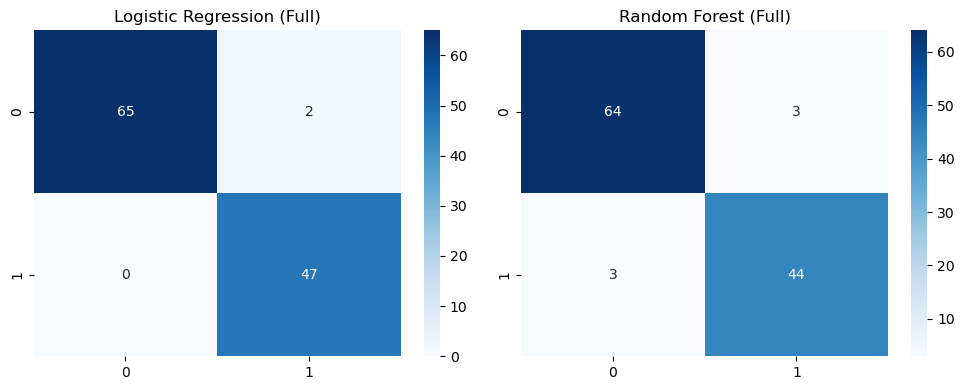

In [20]:
# Predictions without feature selection
y_pred_lr_full = lr_full.predict(X_test)
y_pred_rf_full = rf_full.predict(X_test)

# Confusion matrices
cm_lr_full = confusion_matrix(y_test, y_pred_lr_full)
cm_rf_full = confusion_matrix(y_test, y_pred_rf_full)

# Plotting CMatrix for LR with full features
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(cm_lr_full, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression (Full)")

sns.heatmap(cm_rf_full, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Random Forest (Full)")

plt.tight_layout()
plt.show()

In [24]:
# RFE with Logistic Regression for feature selection
lr_rfe = LogisticRegression()
rfe = RFE(estimator=lr_rfe, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Getting selected features
selected_features = X.columns[rfe.support_].tolist()
print("Top 10 Features selected by RFE:")
print(selected_features)

# Creating new training and test sets with selected features
X_train_rfe = X_train.iloc[:, rfe.support_]
X_test_rfe = X_test.iloc[:, rfe.support_]

# Training Logistic Regression on RFE-selected features
lr_rfe_model = LogisticRegression()
lr_rfe_model.fit(X_train_rfe, y_train)

Top 10 Features selected by RFE:
['area_mean', 'radius_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst']


LogisticRegression()

In [25]:
# Train Random Forest on RFE-selected features

rf_rfe_model = RandomForestClassifier()
rf_rfe_model.fit(X_train_rfe, y_train)

RandomForestClassifier()

In [26]:
# Logistic Regression
y_pred_lr_rfe = lr_rfe_model.predict(X_test_rfe)
print("Logistic Regression (RFE Features)")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_rfe))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_rfe))

Logistic Regression (RFE Features)
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.97      0.98        67
           M       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [27]:
# Random Forest
y_pred_rf_rfe = rf_rfe_model.predict(X_test_rfe)
print("\nRandom Forest (RFE Features)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_rfe))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_rfe))


Random Forest (RFE Features)
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.96      0.96        67
           M       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



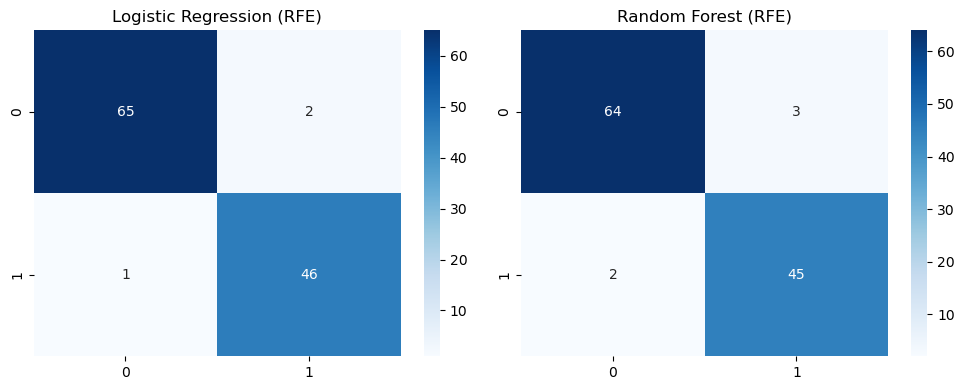

In [28]:
# Predictions with RFE feature selection
y_pred_lr_rfe = lr_rfe_model.predict(X_test_rfe)
y_pred_rf_rfe = rf_rfe_model.predict(X_test_rfe)

# Confusion matrices
cm_lr_rfe = confusion_matrix(y_test, y_pred_lr_rfe)
cm_rf_rfe = confusion_matrix(y_test, y_pred_rf_rfe)

# Plotting CMatrix for LR with RFE
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(cm_lr_rfe, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression (RFE)")

# Plotting CMatrix for RF with RFE
sns.heatmap(cm_rf_rfe, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Random Forest (RFE)")
plt.tight_layout()
plt.show()

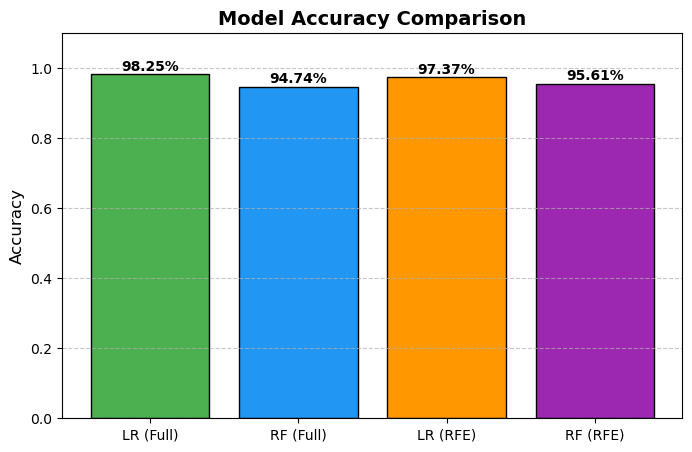

In [29]:
# Comparing Accuracies using Bar Plot
acc_lr_full = accuracy_score(y_test, lr_full.predict(X_test))
acc_rf_full = accuracy_score(y_test, rf_full.predict(X_test))
acc_lr_rfe = accuracy_score(y_test, lr_rfe_model.predict(X_test_rfe))
acc_rf_rfe = accuracy_score(y_test, rf_rfe_model.predict(X_test_rfe))

# Data
models = ["LR (Full)", "RF (Full)", "LR (RFE)", "RF (RFE)"]
accuracies = [acc_lr_full, acc_rf_full, acc_lr_rfe, acc_rf_rfe]

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=["#4CAF50", "#2196F3", "#FF9800", "#9C27B0"], edgecolor="black")

# Labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{acc*100:.2f}%", ha='center', fontsize=10, fontweight="bold")

# Styling
plt.ylim(0,1.1)  # to make space for labels
plt.ylabel("Accuracy", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14, fontweight="bold")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()